# CHAPTER 02. 사이킷런으로 시작하는 머신러닝



In [2]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd


## 02 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

- 붓꽃의 종류를 결정하는 요인(feature) 4가지 - sepal length, ...
- 붓꽃 종류: 3가지


In [3]:
iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df.head(3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### 학습용, 테스트용 데이터 분리


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 11)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


### 학습, 예측


In [5]:
dt_clt = DecisionTreeClassifier(random_state=11)

# 학습
dt_clt.fit(X_train, Y_train)

# 학습된 객체로 예측
predict = dt_clt.predict(X_test)

# 예측 정확도 측정
from sklearn.metrics import accuracy_score
print(format(accuracy_score(Y_test, predict)))


0.9333333333333333


## 03 사이킷런의 기반 프레임워크 익히기




In [6]:
print(type(iris))

&lt;class &#39;sklearn.utils.Bunch&#39;&gt;


In [7]:
iris.keys()

dict_keys([&#39;data&#39;, &#39;target&#39;, &#39;frame&#39;, &#39;target_names&#39;, &#39;DESCR&#39;, &#39;feature_names&#39;, &#39;filename&#39;])

In [8]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 04 Model Selection 모듈 소개

- 학습한 데이터로 테스트를 하면 예측 정확도가 100퍼 나옴.
- 학습용과 테스트용 분리 필요성
- train_test_split() - 에서 test_size 로 전체에서 테스트 데이터의 비율을 설정 가능


### 교차 검증

- 학습, 테스트 데이터가 고정이면 그 데이터가 아닌 데이터를 예상할 때 정확도가 떨어지는 문제가 있음 (과적합)
- 데이터의 편증을 막기위해 여러 데이터 세트로 학습하고 테스트한다
- K 폴드 교차 검증
    - K 개의 데이터 폴드에서 K 번 동안 테스트 데이터 폴드를 교체하며 학습,테스트


In [9]:
from sklearn.model_selection import KFold
import numpy as np

dt_clt = DecisionTreeClassifier(random_state=156)

features = iris.data
label = iris.target

kfoldList = KFold(n_splits=5)
cv_accuracy = []

n_iter = 0

for train_index, test_index in kfoldList.split(features):
    X_train, X_test = features[train_index], features[test_index]
    Y_train, Y_test = label[train_index], label[test_index]

    dt_clt.fit(X_train, Y_train)
    pred = dt_clt.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(Y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(n_iter, accuracy, train_size, test_size,)
    print(test_index, "\n")
    cv_accuracy.append(accuracy)

print(np.mean(cv_accuracy))


1 1.0 120 30
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] 

2 0.9667 120 30
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59] 

3 0.8667 120 30
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89] 

4 0.9333 120 30
[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] 

5 0.7333 120 30
[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] 

0.9


#### Stratified K 폴드

- 불균형한 분포도를 가진 레이블 데이터 셋을 위한 K 폴드 방식. (한쪽으로 치우침)
- 레이블 0 이 대다수고 1 이 아주 적으면 K폴드방식에서 0 과 1 의 비율을 제대로 반영 하지 못함
- 원본과 유사한 레이블 비율을 학습/테스트 데이터 세트에도 유지가능한 방식.


In [10]:
iris_df["label"] = iris.target

iris_df["label"].value_counts()
# 현재 원본 데이터 라벨 분포는 균형적이다.


2    50
1    50
0    50
Name: label, dtype: int64

In [11]:
kfold = KFold(n_splits=3)
for train_index, test_index in kfold.split(iris_df):
    label_train = iris_df["label"].iloc[train_index]
    label_test = iris_df["label"].iloc[test_index]
    print(label_train.value_counts(), "\n")
    print(label_test.value_counts(), "\n")
    print("="*10)

# 원본의 라벨 비율과 안 맞게 나오는 경우가 있음


2    50
1    50
Name: label, dtype: int64 

0    50
Name: label, dtype: int64 

2    50
0    50
Name: label, dtype: int64 

1    50
Name: label, dtype: int64 

1    50
0    50
Name: label, dtype: int64 

2    50
Name: label, dtype: int64 



In [12]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)

for train_index, test_index in skf.split(iris_df, iris_df["label"]):
    label_train = iris_df["label"].iloc[train_index]
    label_test = iris_df["label"].iloc[test_index]

    print(label_train.value_counts(), "\n")
    print(label_test.value_counts(), "\n")
    print("="*10)

# stratifiedKfold 를 사용하면 원본 비율과 거의 비슷하게 나옴


2    34
1    33
0    33
Name: label, dtype: int64 

1    17
0    17
2    16
Name: label, dtype: int64 

1    34
2    33
0    33
Name: label, dtype: int64 

2    17
0    17
1    16
Name: label, dtype: int64 

0    34
2    33
1    33
Name: label, dtype: int64 

2    17
1    17
0    16
Name: label, dtype: int64 



In [13]:
dt_clt = DecisionTreeClassifier(random_state=156)

features = iris.data
label = iris.target

skfold = StratifiedKFold(n_splits=3)
cv_accuracy = []

n_iter = 0

for train_index, test_index in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    Y_train, Y_test = label[train_index], label[test_index]

    dt_clt.fit(X_train, Y_train)
    pred = dt_clt.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(Y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(n_iter, accuracy, train_size, test_size)
    print(test_index, "\n")
    cv_accuracy.append(accuracy)

np.mean(cv_accuracy)

1 0.98 100 50
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115] 

2 0.94 100 50
[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132] 

3 0.98 100 50
[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149] 



0.9666666666666667

#### 교차 검증을 보다 간편하게 - cross_val_score()

1. 데이터 폴드 셋 설정
2. for: 학습/테스트 인덱스 추출 후 예측, 예측 성능 출력


In [14]:
from sklearn.model_selection import cross_val_score

dt_clf = DecisionTreeClassifier(random_state = 156)

scores = cross_val_score(dt_clf, iris.data, iris.target, scoring="accuracy", cv=3)
# scoring = 성능 평가 지표, cv = 데이터 폴드 수
print(scores)
print(np.mean(scores))

[0.98 0.94 0.98]
0.9666666666666667


### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

- 하이퍼 파라미터 값을 조정해 알고리즘의 예측 성능 개선 가능 (classifier, regressor 알고리즘)


In [15]:
grid_parameters = {"max_depth": [1, 2, 3], "min_samples_split": [2, 3]}
# 위 파라미터 집합을 순차적으로 넣어보고 최고 성능 가지는 파라미터 조합 찾기(에스티메이터를 튜닝)
# 파라미터 적용 순서 - (maxdepth, minsplit) = (1,2) (1,3) (2, 2) ...

from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 121)

dt_clf = DecisionTreeClassifier()

grid_dtree = GridSearchCV(dt_clf, param_grid= grid_parameters, cv = 3, refit = True)
grid_dtree.fit(X_train, Y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000747,0.000185,0.000910,0.000062,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,0.000741,0.000115,0.000458,0.000182,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,0.007251,0.008047,0.000693,0.000130,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,0.001980,0.001472,0.003468,0.003946,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,0.009635,0.007910,0.001131,0.000540,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1
5,0.001330,0.000811,0.002437,0.002719,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1


In [16]:
#GridSearchCV fit() 후에 속성에 베스트 스코어 베스트 파라미터가 기록됨

print(grid_dtree.best_params_)
print(grid_dtree.best_score_)

{&#39;max_depth&#39;: 3, &#39;min_samples_split&#39;: 2}
0.975


- GridSearchCV 로 파라미터 튜닝을 수행하고
- 그 에스티메이터로 별도 테스트에서 평가


## 05 데이터 전처리

- null 처리
- 문자열 처리


### 데이터 인코딩

#### 레이블 인코딩


In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
items = ["TV", "냉장고", "TV", "컴퓨터", "선풍기", "선풍기"]

encoder.fit(items)

print(encoder.transform(items), "\n")
print(encoder.classes_, "\n")
print(encoder.inverse_transform([1,2,3,0]), "\n")


[0 1 0 3 2 2] 

[&#39;TV&#39; &#39;냉장고&#39; &#39;선풍기&#39; &#39;컴퓨터&#39;] 

[&#39;냉장고&#39; &#39;선풍기&#39; &#39;컴퓨터&#39; &#39;TV&#39;] 



- 레이블 인코딩에서의 문제
    - 구분하기 위한 숫자로 문자열을 바꿔주는데 숫자의 크고 작음이 머신러닝 알고리즘에 영향을 미칠 수 있음.
    

#### 원-핫 인코딩



In [18]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()

labels = encoder.transform(items)
print (labels)
labels = labels.reshape(-1, 1)
print(labels)
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print(oh_labels)
# 데이터 개수마다 행, 열은 그 분류

[0 1 0 3 2 2]
[[0]
 [1]
 [0]
 [3]
 [2]
 [2]]
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 3)	1.0
  (4, 2)	1.0
  (5, 2)	1.0


In [19]:
df = pd.DataFrame(items)
pd.get_dummies(df)
# get_dummies 로 숫자로 인코딩 할 필요 없이 원 핫 인코딩 가능


,0_TV,0_냉장고,0_선풍기,0_컴퓨터
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,0,0,1
4,0,0,1,0
5,0,0,1,0


### 피처 스케일링과 정규화

- 개별 데이터 값들의 범위를 0~1 로 정규화
1. StandardScaler
2. MinMaxScaler


### StandardScaler


In [20]:
print(iris_df.mean(),"\n")
print(iris_df.var())
#원본 데이터 평균과 분산

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
label                1.000000
dtype: float64 

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
label                0.671141
dtype: float64


In [21]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(iris_df)
iris_stdScaled = std_scaler.transform(iris_df) #ndarray

iris_df_stdScaled = pd.DataFrame(data = iris_stdScaled, columns = iris.feature_names.append("label"))
print(iris_df_stdScaled.mean())
print(iris_df_stdScaled.var())
# 평균, 분산이 0, 1 에 가깝

0   -2.775558e-16
1   -9.695948e-16
2   -8.652338e-16
3   -4.662937e-16
4    1.184238e-17
dtype: float64
0    1.006711
1    1.006711
2    1.006711
3    1.006711
4    1.006711
dtype: float64


### MinMaxScaler

- 0~1 사이의 범위값으로 변환 (음수 있으면 -1 ~ 1)
- 데이터 분포가 가우시안 분포가 아닐 때 


In [22]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

from sklearn.preprocessing import MinMaxScaler

mM_scaler = MinMaxScaler()
mM_scaler.fit(iris_df)

iris_mMScaled = mM_scaler.transform(iris_df)

iris_mMScaled_df = pd.DataFrame(data = iris_mMScaled, columns = iris.feature_names)
iris_mMScaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [23]:
print(iris_mMScaled_df.mean())
print(iris_mMScaled_df.var())
print(iris_mMScaled_df.min())
print(iris_mMScaled_df.max())

sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

- 학습 데이터에서 fit, transform 하고 그 학습 데이터를 학습한 모델의 테스트 데이터 에서는 학습데이터에서 fit 한 스케일러로 transform 한다.(테스트 데이터로 새로 fit 하지 않는다.)
- 원본 데이터에서 fit 하고 나머지에서 transform 만 하는 방식으로 해도 됨


## 06 사이킷런으로 수행하는 타이타닉 생존자 예측



In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

titanic_df = pd.read_csv("../data/titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [25]:
titanic_df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
# null 처리
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace = True)
titanic_df["Cabin"].fillna("N", inplace = True)
titanic_df["Embarked"].fillna("N", inplace = True)

# Cabin 의 알파벳만
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]


In [27]:
titanic_df.groupby(["Sex", "Survived"])["Survived"].count()
# 성에 따른 생존자 수


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

&lt;AxesSubplot:xlabel=&#39;Sex&#39;, ylabel=&#39;Survived&#39;&gt;

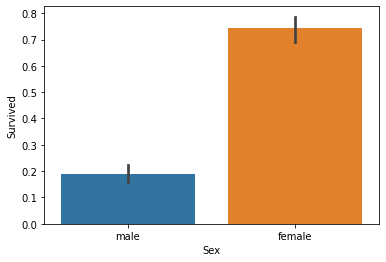

In [28]:
sns.barplot(x="Sex", y = "Survived", data = titanic_df)


&lt;AxesSubplot:xlabel=&#39;Pclass&#39;, ylabel=&#39;Survived&#39;&gt;

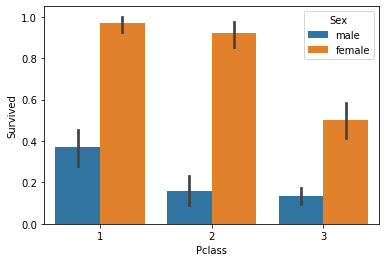

In [29]:
sns.barplot(x="Pclass", y = "Survived", hue = "Sex",  data = titanic_df)



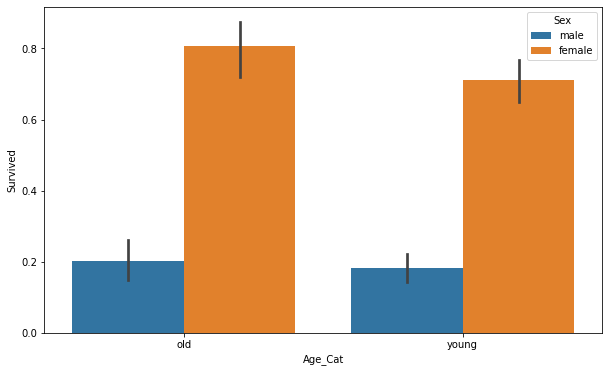

In [30]:
def get_category(age):
    category = ""
    if age <= -1: category = "Unknown"
    elif age <= 30: category = "young"
    elif age <= 30: category = "young"
    elif age <= 30: category = "young"
    elif age <= 30: category = "young"
    else: category = "old"
    return category

# 바그래프 사이즈 조절
plt.figure(figsize = (10, 6))

# X 축 값 바 그래프에서의 순서
order = ["old", "young"]
titanic_df["Age_Cat"] = titanic_df["Age"].apply(lambda x: get_category(x))
sns.barplot(x = "Age_Cat", y = "Survived", hue = "Sex", data = titanic_df, order = order)
titanic_df.drop("Age_Cat", axis = 1, inplace = True)


### 데이터 전처리, 학습, 예측 전과정

1. 데이터 전처리


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)
    return df

def format_features(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for f in features:
        encoder = LabelEncoder()
        encoder = encoder.fit(df[f])
        df[f] = encoder.transform(df[f])
    return df

def preprocessing(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

titanic_df = pd.read_csv("../data/titanic_train.csv")
Y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop("Survived", axis = 1)

X_titanic_df = preprocessing(X_titanic_df)

2. 학습, 테스트 데이터 추출


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_titanic_df, Y_titanic_df, test_size = 0.2, random_state = 11)


3. 세 분류 알고리즘의 학습, 예측, 예측 성능 평가


In [34]:
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

print(accuracy_score(Y_test, dt_clf.fit(X_train, Y_train).predict(X_test)))
print(accuracy_score(Y_test, rf_clf.fit(X_train, Y_train).predict(X_test)))
print(accuracy_score(Y_test, lr_clf.fit(X_train, Y_train).predict(X_test)))

0.7877094972067039
0.8547486033519553
0.8491620111731844


- kfold

In [36]:
def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits=folds)
    scores = []

    for i, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        Y_train, Y_test = Y_titanic_df.values[train_index], Y_titanic_df.values[test_index]
        clf.fit(X_train, Y_train)
        accuracy = accuracy_score(Y_test, clf.fit(X_train, Y_train).predict(X_test))
        scores.append(accuracy)
        print(i, accuracy)
    print (np.mean(scores))
exec_kfold(dt_clf, folds=5)

0 0.7541899441340782
1 0.7808988764044944
2 0.7865168539325843
3 0.7696629213483146
4 0.8202247191011236
0.782298662984119


- cross_val_score() (stratifiedkfold)

In [37]:
scores = cross_val_score(dt_clf, X_titanic_df, Y_titanic_df, cv = 5)
for i, accuracy in enumerate(scores):
    print(i, accuracy)
print(np.mean(scores))


0 0.7430167597765364
1 0.7752808988764045
2 0.7921348314606742
3 0.7865168539325843
4 0.8426966292134831
0.7879291946519366


- GridSearchCV

In [39]:
parameters = {"max_depth": [2, 3, 5, 10], "min_samples_split": [2, 3, 5], "min_samples_leaf": [1, 5, 8]}
grid_dclf = GridSearchCV(dt_clf, param_grid= parameters, scoring = "accuracy", cv = 5)
grid_dclf.fit(X_train, Y_train)

print(grid_dclf.best_params_)
print(grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_

print(accuracy_score(Y_test, best_dclf.predict(X_test)))

{&#39;max_depth&#39;: 3, &#39;min_samples_leaf&#39;: 5, &#39;min_samples_split&#39;: 2}
0.7991825076332119
0.8715083798882681
